# Wrangle and Analyze: WeRateDogs

## Project for Data Analyst Nanodegree
### by Maciej Socha




## Gather

In [1]:
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [4]:
images_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')


In [5]:
df_tweet_json = pd.read_json('tweet-json.txt', lines = True)

## Gather summary

 - 1 Twitter archive of WeRateDogs was downloaded manually from Udacity website
 - 2 Image Predictions downloaded programatically from $url$ This file was hosted on udacity servers. I have used Requests library for this download
 - 3 Tweets JSON was also downloaded manually from Udacity website

## Assess

In [6]:
df_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [7]:
images_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [8]:
df_tweet_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [9]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
images_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [12]:
df_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
images_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
df_tweet_json.head(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
5,2017-07-29 00:08:17+00:00,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,20562,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
6,2017-07-28 16:27:12+00:00,890971913173991426,890971913173991424,Meet Jax. He enjoys ice cream so much he gets ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,12041,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
7,2017-07-28 00:22:40+00:00,890729181411237888,890729181411237888,When you watch your owner call another dog a g...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,56848,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
8,2017-07-27 16:25:51+00:00,890609185150312448,890609185150312448,This is Zoey. She doesn't want to be one of th...,False,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,28226,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
9,2017-07-26 15:59:51+00:00,890240255349198849,890240255349198848,This is Cassie. She is a college pup. Studying...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,32467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [15]:
print(sum(df_archive['tweet_id'].duplicated()))
print(sum(images_predictions['tweet_id'].duplicated()))
print(sum(df_tweet_json['id'].duplicated()))


0
0
0


Luckily for us there is no duplicated values

In [16]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
images_predictions['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
carton                  1
cheetah                 1
school_bus              1
fountain                1
bee_eater               1
Name: p1, Length: 378, dtype: int64

In [19]:
images_predictions['p2'].value_counts()

Labrador_retriever      104
golden_retriever         92
Cardigan                 73
Chihuahua                44
Pomeranian               42
                       ... 
bow                       1
Bernese_mountain_dog      1
screw                     1
bannister                 1
moped                     1
Name: p2, Length: 405, dtype: int64

In [20]:
df_archive.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Blu          1
Ivar         1
Horace       1
Leonard      1
Ambrose      1
Name: name, Length: 957, dtype: int64

## Assess summary

### Quality Issues:
    - 'tweet_id' & 'id' should be converted to string as we will not perform operations on that
    - Timestamp columns are not datetime format
    - Some of the colums have 'None' values
    - Diffrent amounts of images and tweets (2075 vs 2356)
    - Image_predictions have strange answers -> torch for example
    - Some of the tweets are retweets
    - 'None' or 'a' in name column
    - 'rating_numerator' and 'rating_denominator' have some strange values sometimes
    
    
### Tidiness Issues:
    - Too many columns and not every single one is needed for data analysis, we should drop them
    - All of dataframes include ID (either 'tweet_id' or 'id' can be merged into one big DF
    - Breed of the dog - doggo/ floofer/ pupper/ puppo could be merged into one new column 'dog_breed'
    - There is normalized score for dogs, sometimes its 88/80 for example when normalized should be 1,1 etc

## Clean


#### Problem:
    - Some of the colums have 'None' values

#### Code

In [21]:
df_archive['doggo'] = df_archive['doggo'].replace('None', np.nan)
df_archive['floofer'] = df_archive['floofer'].replace('None', np.nan)
df_archive['pupper'] = df_archive['pupper'].replace('None', np.nan)
df_archive['puppo'] = df_archive['puppo'].replace('None', np.nan)

#### Checking if it worked

In [22]:
print(df_archive['doggo'].value_counts())
print(df_archive['floofer'].value_counts())
print(df_archive['pupper'].value_counts())
print(df_archive['puppo'].value_counts())

doggo    97
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    257
Name: pupper, dtype: int64
puppo    30
Name: puppo, dtype: int64


#### Problem:
    - All of dataframes include ID (either 'tweet_id' or 'id' can be merged into one big DF

#### Code

In [23]:
df_all = df_archive.merge(images_predictions, left_on='tweet_id', right_on='tweet_id')
df_all= df_all.merge(df_tweet_json, left_on='tweet_id', right_on='id')

#### Checking if it worked

In [24]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2073 non-null   int64              
 1   in_reply_to_status_id_x        23 non-null     float64            
 2   in_reply_to_user_id_x          23 non-null     float64            
 3   timestamp                      2073 non-null   object             
 4   source_x                       2073 non-null   object             
 5   text                           2073 non-null   object             
 6   retweeted_status_id            79 non-null     float64            
 7   retweeted_status_user_id       79 non-null     float64            
 8   retweeted_status_timestamp     79 non-null     object             
 9   expanded_urls                  2073 non-null   object             
 10  rating_numerator        

#### Problem:
    - Breed of the dog - doggo/ floofer/ pupper/ puppo could be merged into one new column 'dog_breed'
#### Code

In [25]:
df_all['dog_breed'] = df_all['full_text'].str.extract('(doggo|floofer|pupper|puppo)')

#### Checking if it worked

In [26]:
df_all.dog_breed.value_counts()

pupper     230
doggo       75
puppo       29
floofer      3
Name: dog_breed, dtype: int64

#### Problem:
    - Too many columns and not every single one is needed for data analysis, we should drop them

#### Code

In [27]:
not_needed = ['in_reply_to_status_id_x', 'in_reply_to_user_id_x','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
              'source_x', 'expanded_urls','created_at','id', 'id_str', 'truncated', 'display_text_range','entities','extended_entities',
              'source_y','in_reply_to_status_id_y','in_reply_to_status_id_str', 'in_reply_to_user_id_y', 'in_reply_to_user_id_str',
              'in_reply_to_screen_name', 'user', 'geo', 'coordinates','place', 'contributors', 'is_quote_status', 'possibly_sensitive',
              'possibly_sensitive_appealable','lang', 'quoted_status_id','quoted_status_id_str', 'quoted_status',
              'doggo','floofer','pupper','puppo','retweeted','favorited']

df_all.drop(columns = not_needed, inplace=True)

#### Checking if it worked

In [28]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2073 non-null   int64  
 1   timestamp           2073 non-null   object 
 2   text                2073 non-null   object 
 3   rating_numerator    2073 non-null   int64  
 4   rating_denominator  2073 non-null   int64  
 5   name                2073 non-null   object 
 6   jpg_url             2073 non-null   object 
 7   img_num             2073 non-null   int64  
 8   p1                  2073 non-null   object 
 9   p1_conf             2073 non-null   float64
 10  p1_dog              2073 non-null   bool   
 11  p2                  2073 non-null   object 
 12  p2_conf             2073 non-null   float64
 13  p2_dog              2073 non-null   bool   
 14  p3                  2073 non-null   object 
 15  p3_conf             2073 non-null   float64
 16  p3_dog

#### Problem:
'Tweed_id' & 'id' should be converted to string as we will not perform operations on that

#### Note:
 - We can actually skip converting second 'tweet_id' and 'id' as we merged and dropped them

#### Code

In [29]:
df_all['tweet_id'] = df_all['tweet_id'].astype(str) 

#### Checking if it worked

In [30]:
print(type(df_all['tweet_id'][0]))

<class 'str'>


#### Problem:
    - Timestamp columns are not datetime format

#### Code

In [31]:
df_archive['timestamp'] = pd.to_datetime(df_archive['timestamp'])

#### Checking if it worked

In [32]:
print(type(df_archive['timestamp'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### Problem:
    - Some of the tweets are retweets

#### Code

In [33]:
df_all.drop(df_all[df_all['retweeted_status'].notnull()==True].index, inplace = True)

#### Checking if it worked

In [34]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   object 
 1   timestamp           1994 non-null   object 
 2   text                1994 non-null   object 
 3   rating_numerator    1994 non-null   int64  
 4   rating_denominator  1994 non-null   int64  
 5   name                1994 non-null   object 
 6   jpg_url             1994 non-null   object 
 7   img_num             1994 non-null   int64  
 8   p1                  1994 non-null   object 
 9   p1_conf             1994 non-null   float64
 10  p1_dog              1994 non-null   bool   
 11  p2                  1994 non-null   object 
 12  p2_conf             1994 non-null   float64
 13  p2_dog              1994 non-null   bool   
 14  p3                  1994 non-null   object 
 15  p3_conf             1994 non-null   float64
 16  p3_dog

#### Bonus Problem:
    - As there is no more retweeted tweets 'retweeted_status' is not necessary, we can drop it

#### Code

In [35]:
df_all = df_all.drop('retweeted_status', axis =1)

#### Checking if it worked


In [36]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   object 
 1   timestamp           1994 non-null   object 
 2   text                1994 non-null   object 
 3   rating_numerator    1994 non-null   int64  
 4   rating_denominator  1994 non-null   int64  
 5   name                1994 non-null   object 
 6   jpg_url             1994 non-null   object 
 7   img_num             1994 non-null   int64  
 8   p1                  1994 non-null   object 
 9   p1_conf             1994 non-null   float64
 10  p1_dog              1994 non-null   bool   
 11  p2                  1994 non-null   object 
 12  p2_conf             1994 non-null   float64
 13  p2_dog              1994 non-null   bool   
 14  p3                  1994 non-null   object 
 15  p3_conf             1994 non-null   float64
 16  p3_dog

#### Problem:
    - Diffrent amounts of images and tweets (2075 vs 2356)

#### Code

Due to previous tidiness its no longer viable problem as it has been cleaned

#### Problem:
    - Image_predictions have strange answers -> torch for example

#### Code

In [37]:
df_race_count = df_all[df_all['p1_conf']>=0.90]

In [38]:
df_race_count = df_all[df_all['p1_dog']==True]

#### Checking if it worked

In [39]:
df_race_count.p1.value_counts()

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
                     ... 
standard_schnauzer      1
EntleBucher             1
groenendael             1
Japanese_spaniel        1
clumber                 1
Name: p1, Length: 111, dtype: int64

#### Problem:
    - 'None' or 'a' in name column

#### Code

In [40]:
df_names = df_all['name']

In [41]:
df_names.replace('a' , 'None', inplace = True)

In [42]:
df_names.replace('None', np.nan, inplace = True)

#### Checking if it worked

In [43]:
df_names.value_counts()

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Penny       9
           ..
Spencer     1
Aja         1
Burt        1
Gordon      1
Filup       1
Name: name, Length: 934, dtype: int64

#### Problem:
    - 'rating_numerator' and 'rating_denominator' have some strange values sometimes

#### Code

In [44]:
pd.set_option('display.max_colwidth', -1)
df_all.loc[df_all.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

C:\Users\Maciej\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,tweet_id,text,rating_numerator,rating_denominator
345,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
415,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
734,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
876,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
924,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
967,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1001,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1022,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1047,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1065,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [45]:
df_all.loc[df_all.tweet_id=='740373189193256964',['rating_numerator','rating_denominator']]=[14,10]

df_all.loc[df_all.tweet_id=='722974582966214656',['rating_numerator','rating_denominator']]=[13,10]

df_all.loc[df_all.tweet_id=='716439118184652801',['rating_numerator','rating_denominator']]=[11,10]

df_all.loc[df_all.tweet_id=='682962037429899265',['rating_numerator','rating_denominator']]=[10,10]

df_all.loc[df_all.tweet_id=='666287406224695296',['rating_numerator','rating_denominator']]=[9,10]

In [46]:
#pd.set_option('display.max_colwidth', -1)
df_all.loc[df_all.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
345,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
415,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
734,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
924,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1022,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1047,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1065,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1131,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1207,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1379,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130


Tweet id 810984652412424192 is the only one where we cannot calculate proper proportions for score of a dog so we will get rid of this entry. After manually correcting few of the values we are good to go and score the dogs

In [47]:
df_all.drop(index = 415, inplace= True)

#### Checking if it worked

In [48]:
df_all.loc[df_all.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
345,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
734,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
924,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1022,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1047,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1065,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1131,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1207,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1379,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130
1380,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110


In [49]:
df_all.rating_numerator.value_counts()

12      450
10      420
11      397
13      262
9       151
8       95 
7       51 
14      36 
5       33 
6       32 
3       19 
4       15 
2       9  
1       4  
0       2  
420     1  
1776    1  
27      1  
44      1  
45      1  
60      1  
75      1  
80      1  
84      1  
88      1  
99      1  
121     1  
143     1  
144     1  
165     1  
204     1  
26      1  
Name: rating_numerator, dtype: int64

In [50]:
df_all.loc[df_all.rating_numerator==1776,['tweet_id','text','rating_numerator','rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
802,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10


In [51]:
df_all.loc[df_all.rating_numerator==420,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
1795,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10


In [52]:
df_all.loc[df_all.rating_numerator==75,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
558,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10


In [53]:
df_all.loc[df_all.tweet_id=='786709082849828864',['rating_numerator','rating_denominator']]=[10,10]

In [54]:
df_all.loc[df_all.rating_numerator==27,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
614,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


In [55]:
df_all.loc[df_all.tweet_id=='778027034220126208',['rating_numerator','rating_denominator']]=[11,10]

In [56]:
df_all.loc[df_all.rating_numerator==26,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
1451,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [57]:
df_all.loc[df_all.tweet_id=='680494726643068929',['rating_numerator','rating_denominator']]=[11,10]

In [58]:
df_all.loc[df_all.rating_numerator==44,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
1207,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40


As two above records have too high score and doggos are not that good I decided to drop both of them also

In [59]:
df_all.drop(index = 802, inplace= True)
df_all.drop(index = 1795, inplace= True)

In [60]:
df_all.rating_numerator.value_counts()

12     450
10     421
11     399
13     262
9      151
8      95 
7      51 
14     36 
5      33 
6      32 
3      19 
4      15 
2      9  
1      4  
0      2  
165    1  
44     1  
45     1  
60     1  
80     1  
84     1  
88     1  
99     1  
121    1  
143    1  
144    1  
204    1  
Name: rating_numerator, dtype: int64

#### Problem:

    - There is normalized score for dogs, sometimes its 88/80 for example when normalized should be 1,1 etc
    
    
#### Code

In [61]:
df_all['normalized_score'] = df_all['rating_numerator']/df_all['rating_denominator']

In [62]:
df_score = df_all['normalized_score'].value_counts().rename_axis('rating').reset_index(name='value')


In [63]:
df_score.columns = ['rating', 'value']

In [64]:
df_score.sort_values(by='rating', inplace = True)

In [65]:
df_score.set_index('rating', inplace=True)

In [66]:
df_score

,value
rating,
0.0,2
0.1,4
0.2,9
0.3,19
0.4,15
0.5,33
0.6,32
0.7,51
0.8,95


#### Saving all DataFrames into files

In [67]:
df_all.to_csv('twitter_archive_master.csv')

In [68]:
df_names.to_csv('df_names.csv')

In [69]:
df_race_count.to_csv('df_race_count.csv')

In [70]:
df_score.to_csv('df_score.csv', index=False)

# Insights and Visualisations

## #1 Insight

I have made prediction of the dogs to have 90% confidence. There were some pictures of a dogs which had different objects interrupting algorithm to work correctly, but overall there was only a few and it shouldn't affect our findings. Retrievers are most popular dogs $as$ $they$ $should$ $be$. 

In [71]:
goldens = sum(df_race_count.p1 == 'golden_retriever')
labradors = sum(df_race_count.p1 == 'Labrador_retriever')
print((goldens+labradors)/sum(df_race_count.p1.value_counts())*100)

15.842924847664182


Also, they are responsible for almost 16% of correctly recognized photos!

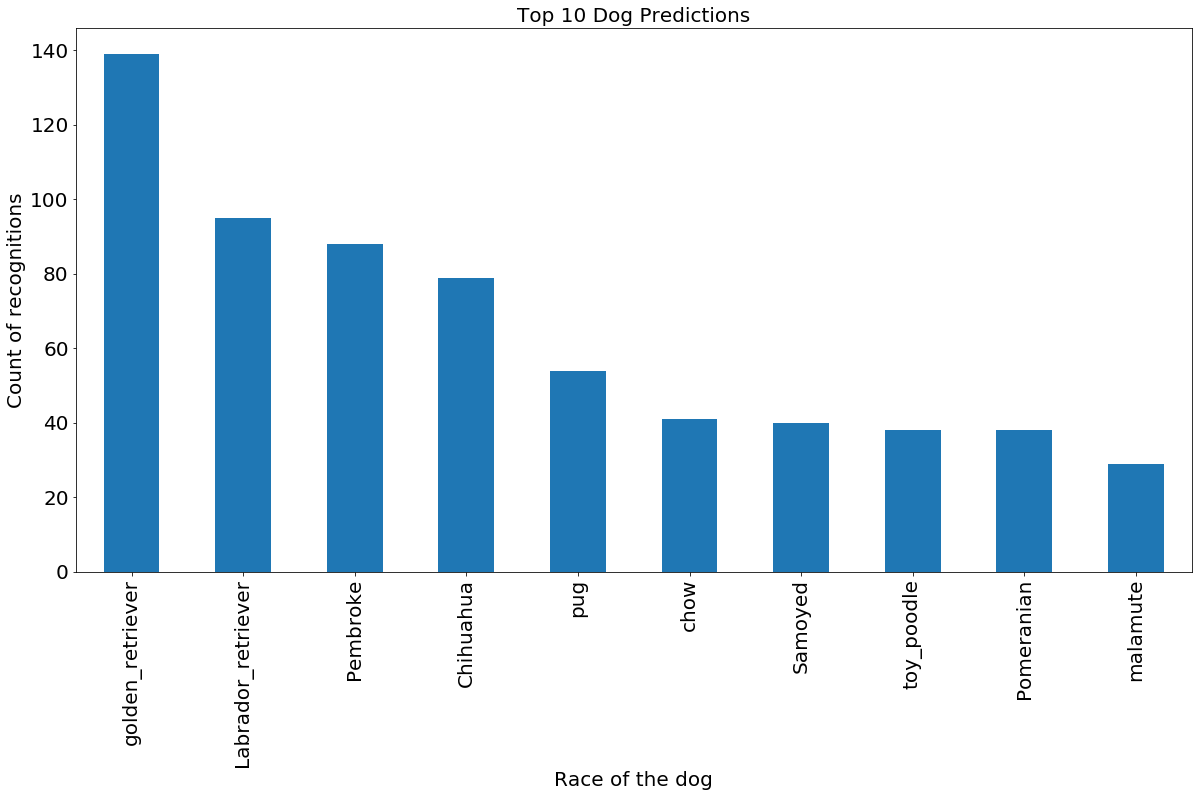

In [72]:
plt.figure(figsize=(20,10))
df_race_count['p1'].value_counts().nlargest(10).plot(kind='bar', fontsize=20)
plt.xlabel('Race of the dog', fontsize=20)
plt.ylabel('Count of recognitions', fontsize=20)
plt.title('Top 10 Dog Predictions', fontsize=20);


## #2 Insight

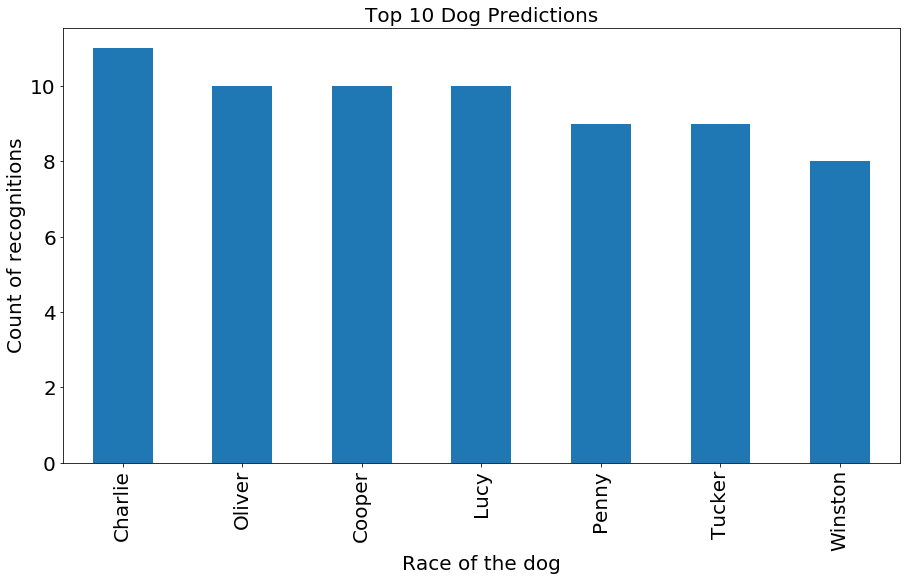

In [73]:
plt.figure(figsize=(15,8))
df_names.value_counts().nlargest(7).plot(kind='bar', fontsize=20)
plt.xlabel('Race of the dog', fontsize=20)
plt.ylabel('Count of recognitions', fontsize=20)
plt.title('Top 10 Dog Predictions', fontsize=20);

Putting names into tweets is not as popular. Huge amount of tweets didn't contain name of the dog. Although obvious winner was Charlie. Be honest, are you sure you didnt know dog named Charlie?

## #3 Insight

Data for scores was quite messy and it required some manual work. Hand adjusting scores is not recommended, but there wasnt that much to be corrected and it only took couple of minutes. Thanks to that we can see, that WeRateDogs really starts at around 8/10 with 14/10 being maximum a dog can expect.
Average dog can expect score of 10-12/10 and has to be very lucky to get 14/10 which was highest normalized score observable: 

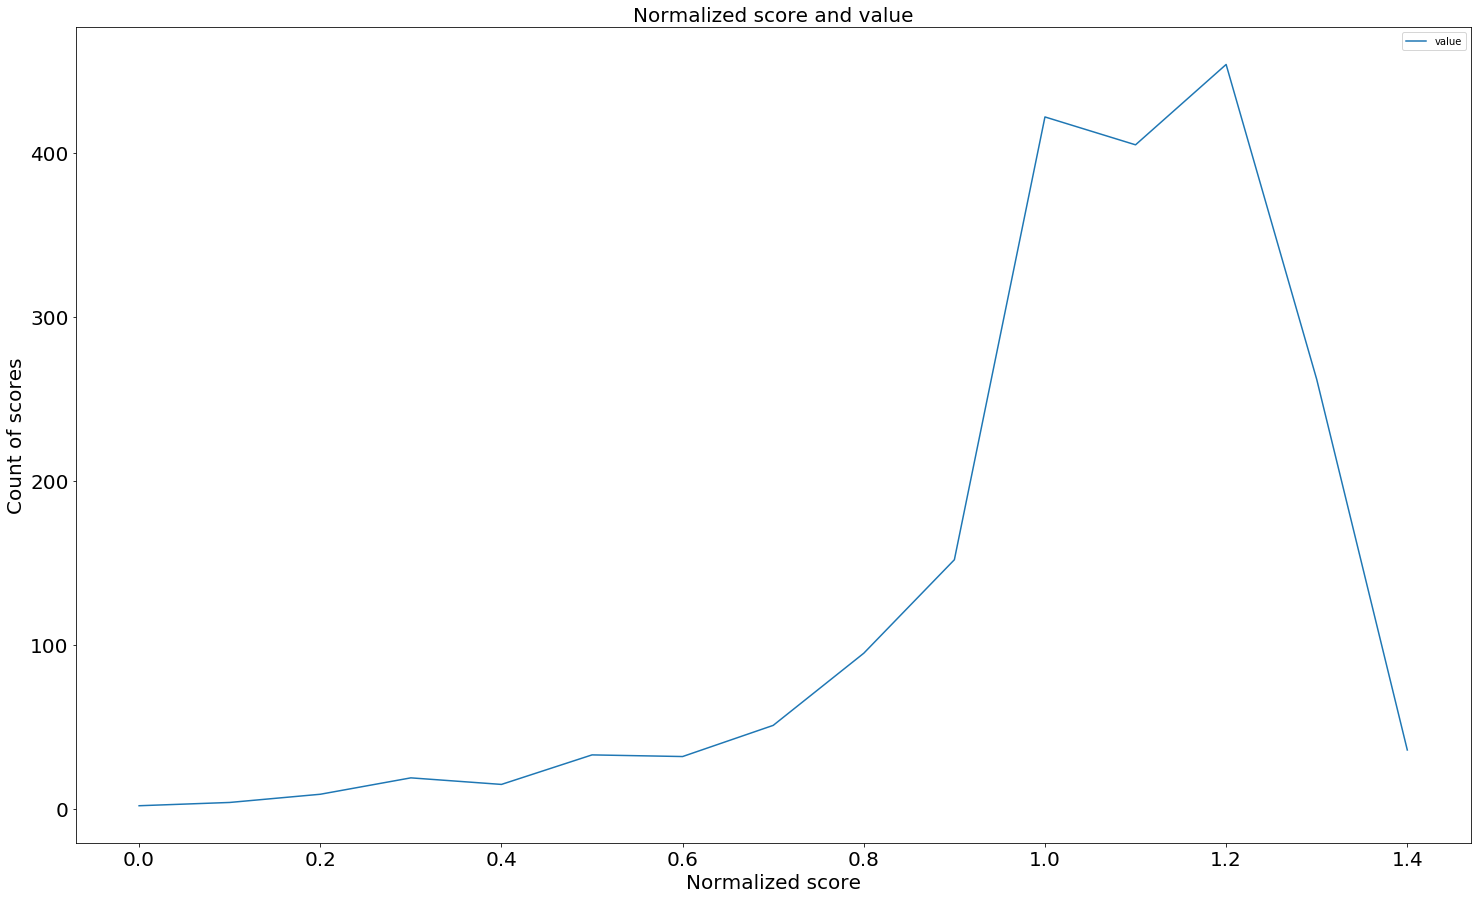

In [74]:
df_score.plot(figsize=(25,15),fontsize=20)
plt.xlabel('Normalized score', fontsize=20)
plt.ylabel('Count of scores', fontsize=20)
plt.title('Normalized score and value', fontsize=20);